**Perfect scenario** <br/>
The blue/green screen (background) is perfectly blue/green with no variation in their brightness.

Here's the image with the target foreground object

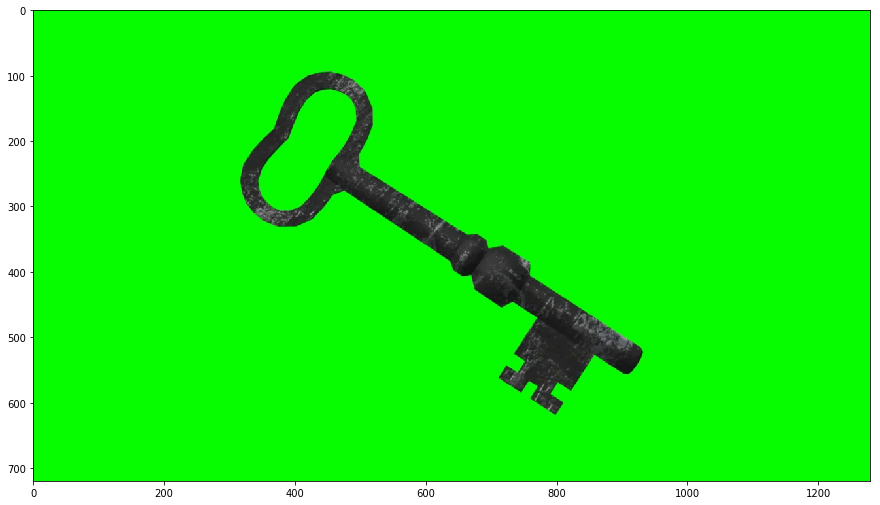

In [4]:
import cv2 as cv
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0)

img = cv.imread("data\\key.png")
plt.imshow(img[:,:,::-1])
plt.show()

Here is our new background

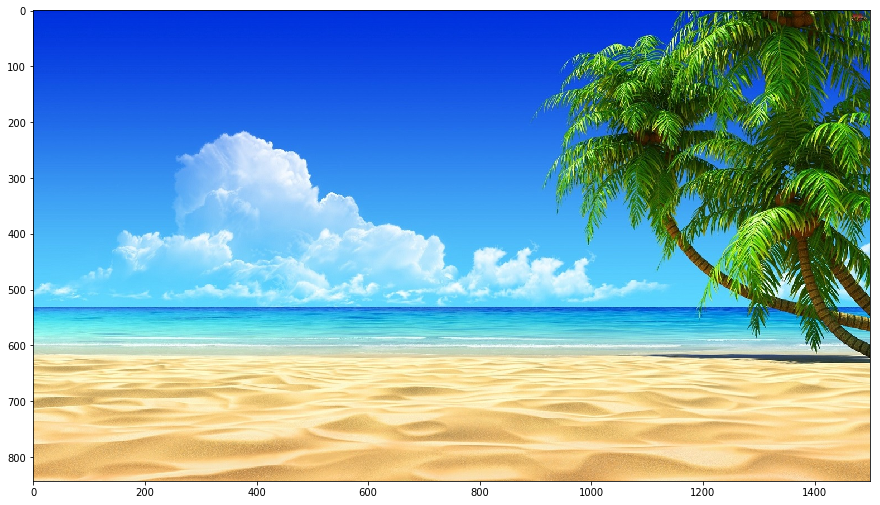

In [5]:
bg_img = cv.imread("data\\beach-backgrounds.jpg")
plt.imshow(bg_img[:,:,::-1])
plt.show()

Let's apply blue matting and compositing

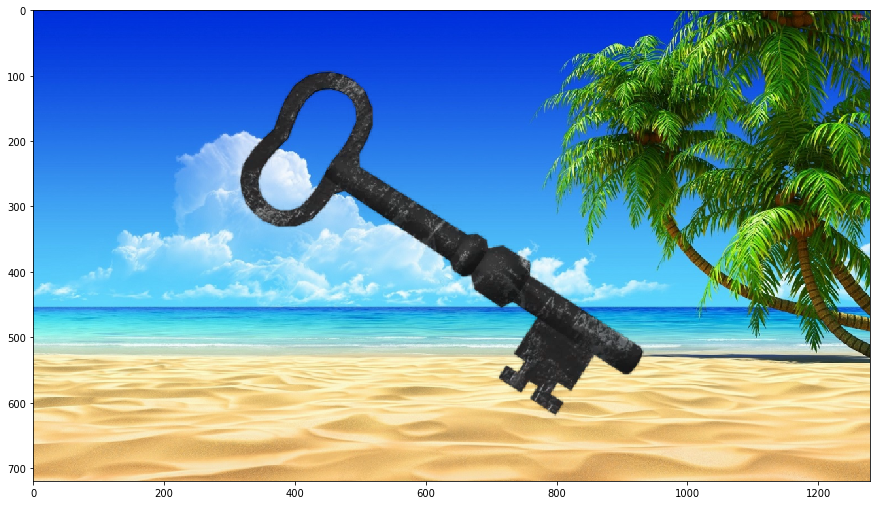

In [6]:
from blue_matting import composite

composite_img = composite("data\\key.png", "data\\beach-backgrounds.jpg", bg_color="green")
plt.imshow(composite_img)
plt.show()

**Imperfect scenario**<br/>
The blue/green screen has various brightness in different areas.

Here's the image with the target foreground object

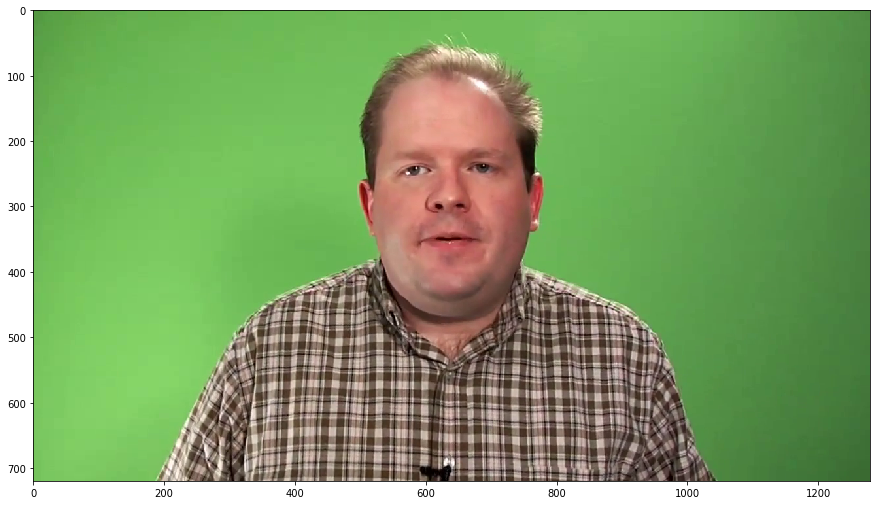

In [7]:
img = cv.imread("data\\tip.png")
plt.imshow(img[:,:,::-1])
plt.show()

Let's apply blue matting and compositing

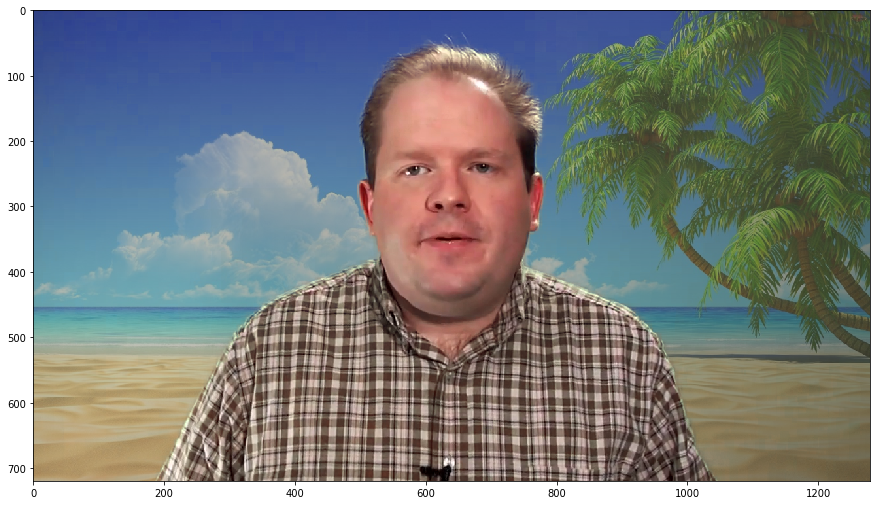

In [8]:
composite_img = composite("data\\tip.png", "data\\beach-backgrounds.jpg", bg_color="green", a1=1.5, a2=1.2)
plt.imshow(composite_img)
plt.show()

Not perfect but the result is pretty impressive. The result can be much better if Second or Third Vlahos Form is used (See http://alvyray.com/Papers/CG/blusig96.pdf for reference).

**Video matting and compositing**<br/>
Let push this idea to the next level. Apply blue matting technique to a video with blue/green screen.

In [13]:
!python video_matting.py \
--video_path data\tip.mp4  \
--bg_path data\beach-backgrounds.jpg  \
--bg_color green  \
--a1 1.5  \
--a2 1.2

Processing..
Frame extraction is done!
Processing..
Image matting and compositing is done!
Processing..
The process has finished! Please look for the file composite_video_tip.mp4



	OpenH264 Video Codec provided by Cisco Systems, Inc.



Note that the sound of the video will be lost during this process since it is not considered in this project. Also the codec used to create the composite video is openh264 (dowload here https://github.com/cisco/openh264/releases. Extract and copy to C:\Windows\System32). This codec is selected so that the video can be played by HTML5. 
<br/> Here's the resulting video.

In [14]:
from IPython.display import Video

Video("results/composite_video_tip.mp4")